In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Practical/Reviews.csv')
df.head

<bound method NDFrame.head of             Id  ...                                               Text
0            1  ...  I have bought several of the Vitality canned d...
1            2  ...  Product arrived labeled as Jumbo Salted Peanut...
2            3  ...  This is a confection that has been around a fe...
3            4  ...  If you are looking for the secret ingredient i...
4            5  ...  Great taffy at a great price.  There was a wid...
...        ...  ...                                                ...
568449  568450  ...  Great for sesame chicken..this is a good if no...
568450  568451  ...  I'm disappointed with the flavor. The chocolat...
568451  568452  ...  These stars are small, so you can give 10-15 o...
568452  568453  ...  These are the BEST treats for training and rew...
568453  568454  ...  I am very satisfied ,product is as advertised,...

[568454 rows x 10 columns]>

In [6]:
text= df['Text']
text=" ".join(review.lower() for review in text)
print(text[0:200])

i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador


In [7]:
from gensim.parsing.preprocessing import remove_stopwords
filtered_sentence = remove_stopwords(text)
print(filtered_sentence[0:200])

bought vitality canned dog food products good quality. product looks like stew processed meat smells better. labrador finicky appreciates product better most. product arrived labeled jumbo salted pean


In [13]:
doc1 = filtered_sentence.split(" ")
doc1 = doc1[0:200]
from nltk.stem import PorterStemmer    
ps = PorterStemmer() 
doc1 = [ps.stem(w) for w in doc1]
print(doc1)

['bought', 'vital', 'can', 'dog', 'food', 'product', 'good', 'quality.', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better.', 'labrador', 'finicki', 'appreci', 'product', 'better', 'most.', 'product', 'arriv', 'label', 'jumbo', 'salt', 'peanuts...th', 'peanut', 'actual', 'small', 'size', 'unsalted.', 'sure', 'error', 'vendor', 'intend', 'repres', 'product', '"jumbo".', 'confect', 'centuries.', 'light,', 'pillowi', 'citru', 'gelatin', 'nut', '-', 'case', 'filberts.', 'cut', 'tini', 'squar', 'liber', 'coat', 'powder', 'sugar.', 'tini', 'mouth', 'heaven.', 'chewy,', 'flavorful.', 'highli', 'recommend', 'yummi', 'treat.', 'familiar', 'stori', 'c.s.', "lewis'", '"the', 'lion,', 'witch,', 'wardrobe"', '-', 'treat', 'seduc', 'edmund', 'sell', 'brother', 'sister', 'witch.', 'look', 'secret', 'ingredi', 'robitussin', 'believ', 'it.', 'got', 'addit', 'root', 'beer', 'extract', 'order', '(which', 'good)', 'cherri', 'soda.', 'flavor', 'medicinal.', 'great', 'taffi', 'great', '

In [15]:
words={}
for word in doc1:
  if (word in words):
    words[word] += 1
  else:
    words[word] = 1
print(words)
sorted_news = sorted(words, key = words.get, reverse=True)    
hist_words={}
stopwords=["_",'\'',',','—']
count=0
for i in sorted_news: 
    if (count<10 and i not in stopwords):
        hist_words[i]=words[i]
        count += 1
print(hist_words)

{'bought': 1, 'vital': 1, 'can': 1, 'dog': 2, 'food': 1, 'product': 5, 'good': 2, 'quality.': 1, 'look': 2, 'like': 1, 'stew': 1, 'process': 1, 'meat': 1, 'smell': 1, 'better.': 1, 'labrador': 1, 'finicki': 1, 'appreci': 1, 'better': 1, 'most.': 1, 'arriv': 1, 'label': 1, 'jumbo': 1, 'salt': 1, 'peanuts...th': 1, 'peanut': 1, 'actual': 1, 'small': 1, 'size': 1, 'unsalted.': 1, 'sure': 1, 'error': 1, 'vendor': 1, 'intend': 1, 'repres': 1, '"jumbo".': 1, 'confect': 1, 'centuries.': 1, 'light,': 1, 'pillowi': 1, 'citru': 1, 'gelatin': 1, 'nut': 1, '-': 2, 'case': 1, 'filberts.': 1, 'cut': 1, 'tini': 2, 'squar': 1, 'liber': 1, 'coat': 1, 'powder': 1, 'sugar.': 1, 'mouth': 1, 'heaven.': 1, 'chewy,': 1, 'flavorful.': 1, 'highli': 2, 'recommend': 4, 'yummi': 2, 'treat.': 2, 'familiar': 1, 'stori': 1, 'c.s.': 1, "lewis'": 1, '"the': 1, 'lion,': 1, 'witch,': 1, 'wardrobe"': 1, 'treat': 1, 'seduc': 1, 'edmund': 1, 'sell': 1, 'brother': 1, 'sister': 1, 'witch.': 1, 'secret': 1, 'ingredi': 1, 'rob

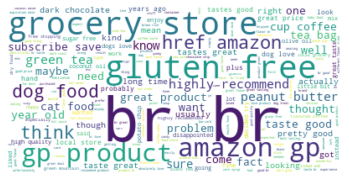

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
% matplotlib inline
stopword=set(STOPWORDS)
stopword.update('_','\'',"'",'-')
wordcloud=WordCloud(stopwords=stopword,background_color='White').generate(filtered_sentence)
wordcloud.to_file('wordcloud.png')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

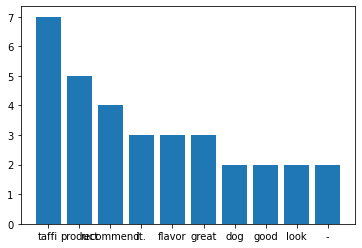

In [18]:
keys=hist_words.keys()
values=hist_words.values()
plt.bar(keys,values)
plt.savefig('histogram.pdf')